In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')

#### Read Files

In [2]:
logs = "results/motif_analysis/chipseq_enrichment/logs/*.out"

In [3]:
data = []
for log in glob.glob(logs):
    sample_data = []
    skip = False
    with open(log) as f:
        for line in f:
            if "PPATZ1" in line:
                skip = True
            if "Protein: " in line:
                sample_data.append((line.strip().split(": ")[1]))
            if "Motif Sites: " in line:
                sample_data.append((line.strip().split(": ")[1]))
            if "Cell Type" in line:
                sample_data.append((line.strip().split(": ")[1]))
            if "Sample: " in line:
                sample_data.append((line.strip().split(": ")[1]))
            if "Total foreground regions with motif overlap:" in line:
                sample_data.append(int(line.strip().split(": ")[1]))
            if "Total foreground regions with motif and ChIP-seq overlap:" in line:
                sample_data.append(int(line.strip().split(": ")[1]))
#             if "Fraction of foreground regions with motif and ChIP-seq overlap:" in line:
#                 if len(line.strip().split(": ")) > 1:
#                     sample_data.append(float(line.strip().split(": ")[1]))
#                 else:
#                     sample_data.append("N/A")
            if "Total background regions:" in line:
                sample_data.append(int(line.strip().split(": ")[1]))
            if "Total background regions with ChIP-seq overlap:" in line:
                sample_data.append(int(line.strip().split(": ")[1]))
#             if "Fraction of background regions with ChIP-seq overlap:" in line:
#                 if len(line.strip().split(": ")) > 1:
#                     sample_data.append(float(line.strip().split(": ")[1]))
#                 else:
#                     sample_data.append("N/A")
#             if "Enrichment Ratio:" in line:
#                 if len(line.strip().split(": ")) > 1:
#                     sample_data.append(float(line.strip().split(": ")[1]))
#                 else:
#                     sample_data.append("N/A")
    if not skip:
        data.append(sample_data)
df = pd.DataFrame(data)  

In [4]:
df.columns = ["Protein", "Motif", "Cell Type", "Sample", "Total Fgd", "Total Fgd Overlap ChIP-seq", "Total Bkgd", "Total Bkgd Overlap ChIP-seq"]
df = df.loc[df["Total Fgd"] > 0] # no motif sites for this motif
df["Frgd Plus 1"] = df.apply(lambda x : x["Total Fgd Overlap ChIP-seq"] + 1, axis = 1)
df["Bkgd Plus 1"] = df.apply(lambda x : x["Total Bkgd Overlap ChIP-seq"] + 1, axis = 1)
df["ER_new"] = df.apply(lambda x : x["Frgd Plus 1"] / x["Bkgd Plus 1"], axis = 1)
df

,Protein,Motif,Cell Type,Sample,Total Fgd,Total Fgd Overlap ChIP-seq,Total Bkgd,Total Bkgd Overlap ChIP-seq,Frgd Plus 1,Bkgd Plus 1,ER_new
0,ZNF135,CTCF,293T,Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H...,351,0,351.0,0.0,1,1.0,1.000000
1,ZNF460,ZNF460,HepG2,Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sa...,6182,826,6182.0,24.0,827,25.0,33.080000
2,PATZ1,CTCF,HepG2,JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K2...,151,92,151.0,9.0,93,10.0,9.300000
3,PATZ1,PATZ1,HepG2,Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens....,3081,1544,3081.0,69.0,1545,70.0,22.071429
4,ZNF460,CTCF,293T,CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens...,336,10,336.0,1.0,11,2.0,5.500000
...,...,...,...,...,...,...,...,...,...,...,...
643,ZNF460,CTCF,HepG2,SNU719.GSE239992.Homo_Sapiens.H3K27ac.biorep_m...,364,43,364.0,4.0,44,5.0,8.800000
644,ZNF460,ZNF460,293T,SNU16.GSE159985.Homo_Sapiens.H3K27ac.b1,2733,276,2733.0,9.0,277,10.0,27.700000
645,KLF15,CTCF,HepG2,MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H...,386,51,386.0,3.0,52,4.0,13.000000
646,ZNF135,CTCF,293T,NK92.GSE227663.Homo_Sapiens.H3K27ac.biorep_merged,1168,3,1168.0,0.0,4,1.0,4.000000


In [5]:
df.loc[(df["Protein"] == "KLF15") & (df["Motif"] == "KLF15") & (df["Cell Type"] == "HepG2")].merge(df.loc[(df["Protein"] == "KLF15") & (df["Motif"] == "CTCF") & (df["Cell Type"] == "HepG2")], on = "Sample")

,Protein_x,Motif_x,Cell Type_x,Sample,Total Fgd_x,Total Fgd Overlap ChIP-seq_x,Total Bkgd_x,Total Bkgd Overlap ChIP-seq_x,Frgd Plus 1_x,Bkgd Plus 1_x,...,Protein_y,Motif_y,Cell Type_y,Total Fgd_y,Total Fgd Overlap ChIP-seq_y,Total Bkgd_y,Total Bkgd Overlap ChIP-seq_y,Frgd Plus 1_y,Bkgd Plus 1_y,ER_new_y
0,KLF15,KLF15,HepG2,CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens...,3534,812,3534.0,12.0,813,13.0,...,KLF15,CTCF,HepG2,337,54,337.0,1.0,55,2.0,27.500000
1,KLF15,KLF15,HepG2,KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1,2969,645,2969.0,16.0,646,17.0,...,KLF15,CTCF,HepG2,505,68,505.0,4.0,69,5.0,13.800000
2,KLF15,KLF15,HepG2,CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens...,3466,813,3466.0,8.0,814,9.0,...,KLF15,CTCF,HepG2,331,47,331.0,0.0,48,1.0,48.000000
3,KLF15,KLF15,HepG2,Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sa...,3023,697,3023.0,4.0,698,5.0,...,KLF15,CTCF,HepG2,350,50,350.0,1.0,51,2.0,25.500000
4,KLF15,KLF15,HepG2,YCCEL1.GSE239992.Homo_Sapiens.H3K27ac.biorep_m...,4345,936,4345.0,11.0,937,12.0,...,KLF15,CTCF,HepG2,722,106,722.0,4.0,107,5.0,21.400000
5,KLF15,KLF15,HepG2,Wei-22RV1-Control.GSE200165.Homo_Sapiens.H3K27...,4940,896,4940.0,10.0,897,11.0,...,KLF15,CTCF,HepG2,2111,160,2111.0,4.0,161,5.0,32.200000
6,KLF15,KLF15,HepG2,LNCaP.GSE235245.Homo_Sapiens.H3K27ac.biorep_me...,2330,469,2330.0,9.0,470,10.0,...,KLF15,CTCF,HepG2,602,68,602.0,0.0,69,1.0,69.000000
7,KLF15,KLF15,HepG2,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens...,4236,962,4236.0,13.0,963,14.0,...,KLF15,CTCF,HepG2,470,67,470.0,3.0,68,4.0,17.000000
8,KLF15,KLF15,HepG2,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27a...,1654,402,1654.0,12.0,403,13.0,...,KLF15,CTCF,HepG2,96,14,96.0,0.0,15,1.0,15.000000
9,KLF15,KLF15,HepG2,Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens....,1938,395,1938.0,10.0,396,11.0,...,KLF15,CTCF,HepG2,316,42,316.0,2.0,43,3.0,14.333333


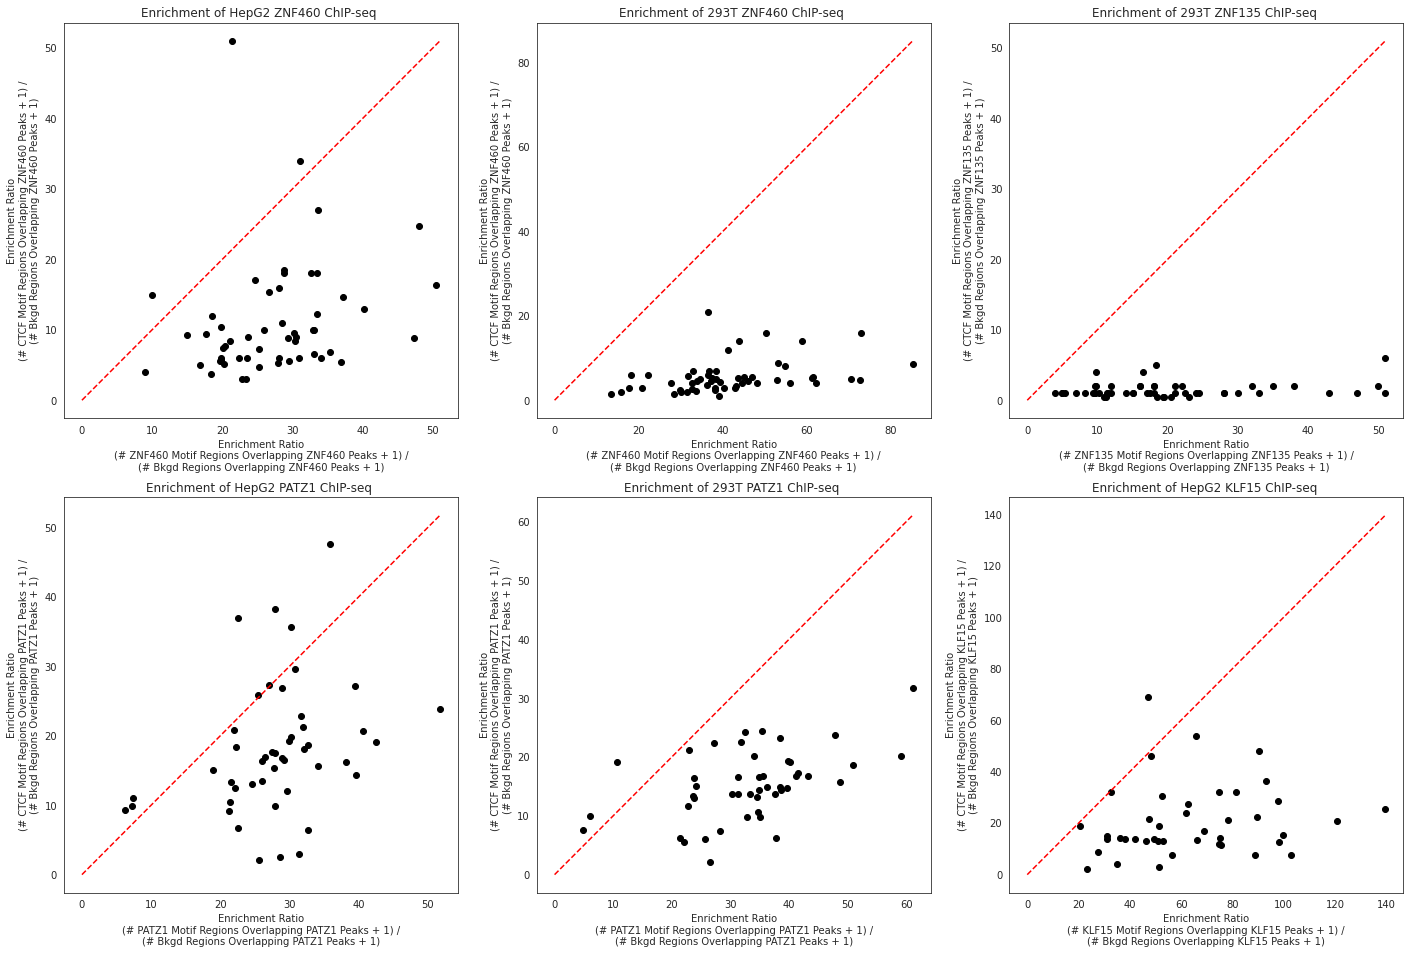

In [9]:
sns.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

pairs = [("ZNF460", "HepG2", 0, 0), ("ZNF460", "293T", 0, 1), ("ZNF135", "293T", 0, 2), ("PATZ1", "HepG2", 1, 0), ("PATZ1", "293T", 1, 1), ("KLF15", "HepG2", 1, 2)]

for i in range(0, len(pairs)) :
    protein = pairs[i][0]
    cell_type = pairs[i][1]
    df1 = df.loc[(df["Protein"] == protein) & (df["Motif"] == protein) & (df["Cell Type"] == cell_type)].merge(df.loc[(df["Protein"] == protein) & (df["Motif"] == "CTCF") & (df["Cell Type"] == cell_type)], on = "Sample")
    df1.replace("N/A", 0, inplace=True)
    axes[pairs[i][2], pairs[i][3]].scatter(df1["ER_new_x"], df1["ER_new_y"], color='k')
    axes[pairs[i][2], pairs[i][3]].plot([0, max(df1["ER_new_x"].max(), df1["ER_new_y"].max())], 
                    [0, max(df1["ER_new_x"].max(), df1["ER_new_y"].max())], 
                 color='red', linestyle='--', label='y = x')
    axes[pairs[i][2], pairs[i][3]].set_xlabel('Enrichment Ratio\n(# {p} Motif Regions Overlapping {p} Peaks + 1) /\n(# Bkgd Regions Overlapping {p} Peaks + 1)'.format(p = protein))
    axes[pairs[i][2], pairs[i][3]].set_ylabel('Enrichment Ratio\n(# CTCF Motif Regions Overlapping {p} Peaks + 1) /\n(# Bkgd Regions Overlapping {p} Peaks + 1)'.format(p = protein))
    axes[pairs[i][2], pairs[i][3]].set_title("Enrichment of {ct} {p} ChIP-seq ".format(ct = cell_type, p = protein))
    
fig.savefig("results/figures//motifs/1D_chipseq_enrichment.02.06.25.png", dpi = 1000, bbox_inches="tight")